<center>

# **"Rainbow" 3D animation**

Small code to be able to quiclky visualise the 3D data gotten for the Rainbow event. To run the code, there is a .venv/ python environment (and the equivalent requirements.txt file) in the same folder that has the necessary modules.
</center>

<font color='orange'> NOTE: </font> If on the remote server you are not using an IDE that has a jupyter notebook visualisation tool integrated inside it, then you'll need to connect through an ssh tunnel:

- connect to one of the remote servers through ssh 
- create a Jupyter Lab instance in --no-bowser mode and specify the port, i.e. type **jupyter-lab --no-browser --port=8080** 
- in local, open the ssh tunnel, i.e. type **ssh -NL 8080:localhost:8080 {username}@{hostname}** 
- paste the link gotten from the Jupyter Lab instance in your browser

#### Keyword arguments:

The  keyword arguments give what will be computed and hence what is also plotted.

- **Data:**
> **everything** ('bool' - default=False) : Computes everything (not recommend except if you don't mind a laggy visualisation and/or setting most of the variables to not visible manually). \
> **all_data** ('bool' - default=False) : visualisation of all the data (i.e. data with the duplicates). \
> **duplicates** ('bool' - default=False) : visualisation of the 2 data sets without duplicates from Stereo and then SDO. \
> **no_duplicate** ('bool' - default=False) : visualisation of the data set with only no duplicate values. \
> **line_of_sight** ('bool' - default=False) : visualisation of the line of sight data. \
> **trace_data** ('bool' - default=False) : visualisation of the "trace" of all the data. \
> **trace_no_duplicate** ('bool' - default=False) : visualisation of the "trace" of the no duplicate data.\
> **day_trace** ('bool' - default=False) : visualisation of the "trace" of all_data seperated by day. \
> **day_trace_no_duplicate** ('bool' - default=False) : visualisation of the "trace" of no_duplicate seperated by day. \
> **time_intervals_all_data** ('bool - default=False) : visualisation of the all data integration over a given time interval.\
> **time_intervals_no_duplicate** ('bool - default=False) : visualisation of the no duplicate integration over a given time interval.\
> **time_interval** ('int' or 'str' - default=1) : the time integration interval. In minutes (if 'min' in str), hours (if 'int' or 'h' in str), days (if 'd' in str).


- **Visualisation:**
> **compression_level** ('int' - default=9) : compression level for the data in the visualisation. minimum is -1 and maximum is 9. \
> **plot_height** ('int' - default=1260) : height in pixels of the visualisation (the k3d default value is set to 512). \
> **sun** ('bool' - default=False) : creating the Sun with the corresponding texture. \
> **stars** ('bool' - default=False) : creating stars in the background. \
> **sun_texture_resolution** ('int' - default=960) : number of pixels for the Sun's texture in the theta direction. \
> **sleep_time** ('int' or 'float' - default=2) : times (in seconds) between each time frame when playing the animation. 1.5 seconds is basically the non laggy minimum.\
> **camera_fov** ('int' or 'float' - default=1) : FOV of the camera in degrees (the initial distance of the sun is computed accordingly). \
> **camera_pos** ('tuple[int | float, int | float, int | float]' or None - default=None) : position of the camera multiplied by 1au. \
> **camera_zoom_speed** ('int' or 'float' - default=0.7) : zoom speed when trying to zooming in or out. \
> **fov_center** ('tuple[int | float, int | float, int | float]' or 'str' - default='cubes') : choosing the center of the camera field of view. When a string, can choose between 'cubes' or 'sun' as the center. \
> **stereo_pov** ('bool' - default=Flase) : choosing to follow the point of view of STEREO. 'camera_fov' is also automatically set. \
> **sdo_pov** ('bool' - default=False) : choosing to follow the point of view of SDO. 'camera_fov' is automatically set. \
> **trace_opacity** ('int' or 'float' - default=0.1) : the opacity for any trace visualisation. \
> **up_vector** ('tuple[int, int, int]' - default=(0, 0, 1) : choosing the up vector of the camera.

- **Screenshots:**
> **make_screenshots** ('bool' - default=False) : Creates screenshots of the display when clicking play.   
> **screenshot_scale** ('int' - default=2) : 'Resolution' of the screenshot. The higher the number the more precise it is. \
> **screenshot_sleep** ('int' or 'float' - default=5) : the sleep time between each screenshot. Time is needed to synchronize the screenshots. \
> **screenshot_version** ('str' - default='v0') : end name of each screenshot. Needed if you want to save different point of views.

- **Class methods:**
>**K3dAnimation.The_usual**(version: int, data:str = 'no_duplicate', **kwargs): To automatically use the usual arguments for for the *K3dAnimation Class* depending on the version of the screenshot that needs to be saved ('version' can has an integer value of 0 to 3 included). 'data' decides the data type that you want to save. Not all data types are possible here. Only 'all_data', 'no_duplicate' and the corresponding time_interval data are allowed. Furthermore, you can also manually change the arguments if needed be (e.g. 'screenshot_version' if you are testing stuff).

- **Miscellaneous:**
> **_batch_number** ('int' - default=6) : number of processes for the I/O bound tasks.

In [ ]:
from animation_code import K3dAnimation

# VISUALISATION
K3dAnimation(
    sun=True,
    all_data=True,
    no_duplicate=False,
    all_data_integration=False,
    no_duplicate_integration=False,
    line_of_sight_SDO=True,
    line_of_sight_STEREO=True,
    pov_sdo=True,
    pov_stereo=False,
    polynomial=False,
    polynomial_order=4,
    with_feet=False,
    only_fake_data=False,
)

In [ ]:
# looking at the interpolations
from visualisation_test import Visualise
import os
print(os.getcwd())

# Paths
hdf5 = '../Data/sig1e20_leg20_lim0_03_thisone.h5'
index = 200

instance = Visualise(
    hdf5_filepath=hdf5,
    chosen_index=index,
    recreate_interp=True,
    with_feet=True,
    interpolation_order=[4, 6],
)

instance.print_parameters()
instance.plotting()

In [ ]:
from test_visualisation import K3dAnimation

K3dAnimation(
    sun=False,
    data=False,
    pov=True,
    center=True,
    sun_pos=(0, 0, 5),
    camera_pos=(8, 0, 0),
    up_vector=(0, 0, 1),
    camera_reference=(0, 0, 0),
    texture_resolution=10,
    processes=5,
    camera_fov=110,
)

In [ ]:
import k3d
import numpy as np

voxels = np.zeros((1, 2, 4), dtype='uint8')
voxels[0, 0, 1] = 1
voxels[0, 1, 3] = 1
plt_voxels = k3d.voxels(voxels.transpose(2, 1, 0),
                        color_map=[0xfdc192, 0xa15525],
                        outlines_color=0xffffff)

plot = k3d.plot()
plot += plt_voxels
plot.display()

In [ ]:
voxels[1, 1, 1]

In [ ]:
import k3d
import os
import numpy as np
from Trying_the_braycenter_fitting import TESTING_STUFF
import matplotlib.pyplot as plt



Projection_test = TESTING_STUFF()
rotated_data = Projection_test.Matrix_rotation()

indexes = [0, 5, 40, 90, 200]
for loop, rot_data in enumerate(rotated_data):
    # print(f'rotated data shape is {rot_data.shape}')

    x = rot_data[0, :] 
    y = rot_data[1, :]
    z = rot_data[2, :]

    for arr in [x, y, z]:
        if np.any(arr < 0) and np.any(arr>0): print(f"\033[92m{indexes[loop]} one of the array has negative and positive values \033[0m")  

    # print(f'x shape first is {x.shape}')
    r = np.hypot(x, y)
    # theta = np.arcsin(y, r)
    theta = np.pi / 2 - np.arctan2(y, x) 
    theta = np.where(theta < 0, theta + 2 * np.pi, theta)
    theta = np.degrees(theta) 

    # sun_center = np.array([0, 0, 0])
    # x = np.append(x, sun_center[0])
    # y = np.append(y, sun_center[1])
    # z = np.append(z, sun_center[2])
    # print(f'x shape is {x.shape}')
    plt.figure()
    plt.title(f'index{indexes[loop]}')
    plt.scatter(x , y, s=1)
    plt.show()

    # plt.figure()
    # plt.title(f'index{indexes[loop]}')
    # plt.scatter(y / solar_r, z / solar_r)
    # plt.show()

    # plt.figure()
    # plt.title(f'index{indexes[loop]}')
    # plt.scatter(z / solar_r, x / solar_r)
    # plt.show()

    # plt.figure()
    # plt.title(f'index{indexes[loop]}')
    # plt.scatter(theta, r / 10**3)
    # plt.ylim(700, 870)
    # plt.show()


y is 3
x is 0
z is 1

# Visualisation tests

Time integrated/No duplicates new/Time integration of 24.0 hours
Time integrated/No duplicates new/Time integration of 24.0 hours/6th order interpolation
The saved x parameters are 92.453766, 42.508377, -1462.3478, 7695.2417, -16525.68, 15950.144, -5680.1206
the final shape the transposed coords is (149154, 3)
t_fine shape is (149154,) and x shape is (149154,)
t shape is (149154,) with X shape (149154,)
the new coefficients are ['26.545636866432595, ', '124.41829835801667, ', '1255.3781154020917, ', '-8390.91053709583, ', '19333.065309730624, ', '-18674.55835829476, ', '6520.539051954006, ']


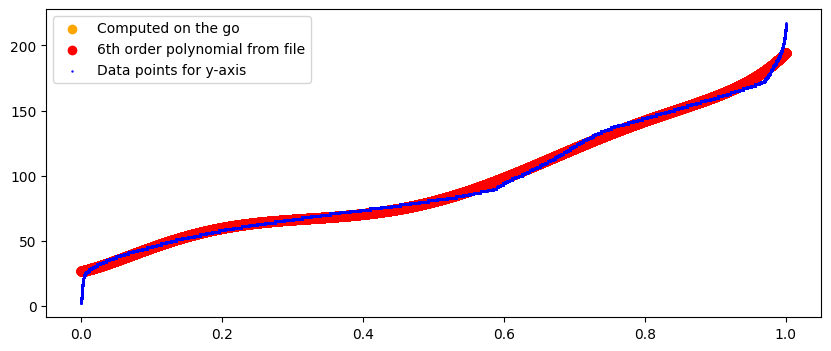

the new coefficients are ['92.4537709753074, ', '42.50824635194396, ', '-1462.3472115894358, ', '7695.241385902975, ', '-16525.68095755541, ', '15950.145895450813, ', '-5680.121835762018, ']


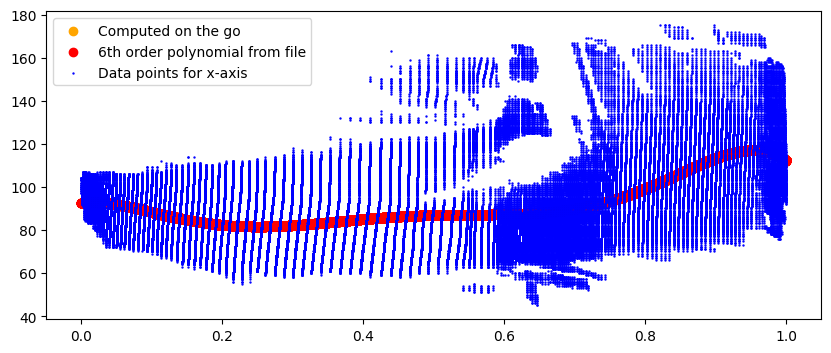

the new coefficients are ['188.66541229125954, ', '-436.71456531065434, ', '4374.278847472132, ', '-21947.5078549922, ', '49815.910853108704, ', '-49076.95177925262, ', '17387.46317540349, ']


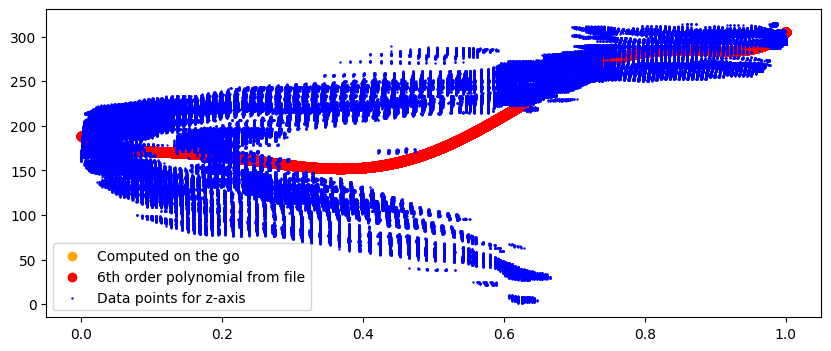

In [1]:
# looking at the interpolations
from visualisation_test import Visualise

# Paths
hdf5 = '../Data/order0213.h5'
index = 150
group_paths = [
    f'Time integrated/No duplicates new/Time integration of 24.0 hours{added}'
    for added in ['', '/6th order interpolation']
]

instance = Visualise(
    hdf5_filepath=hdf5,
    group_paths=group_paths,
    chosen_index=index,
    recreate_interp=True
)

instance.print_parameters()
instance.plotting()